<h1 style="color:blue;"> REGRESSÃO LINEAR </h1>
### Verificando o preço de um apartamento

Regressão Linear é o processo estatístico que procura determinar a 
equação matemática (função agente) 
mais adequada para definir a relação entre duas variáveis.

Muitas vezes a posição dos pontos experimentais no diagrama de dispersão sugere a existência de uma relação funcional entre as duas variáveis.


In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import linear_model

%matplotlib inline

<h4 style="color:blue;">LENDO O ARQUIVO DE DADOS </h4>

In [227]:
df = pd.read_csv("aptoN.csv")


<h4 style="color:blue;">FORMATO DOS DADOS</h4>

In [228]:
df.shape

(34, 4)

<h4 style="color:blue;">TIPOS DOS DADOS</h4>

In [229]:
df.dtypes

id               int64
m2               int64
preco          float64
localizacao     object
dtype: object

<h4 style="color:blue;">PRIMEIROS REGISTROS</h4>

In [230]:
df.head()

,id,m2,preco,localizacao
0,111,76,210.0,B
1,2,78,250.0,B
2,232,100,310.0,B
3,4,77,220.0,B
4,5,80,300.0,E


<h4 style="color:blue;">RESUMO DO ARQUIVO DE DADOS</h4>

In [231]:
df.describe()

,id,m2,preco
count,34.000000,34.000000,29.000000
mean,85.088235,114.647059,277.068966
std,186.458927,44.142251,99.080750
min,2.000000,50.000000,100.000000
25%,13.250000,78.500000,210.000000
50%,21.500000,100.000000,270.000000
75%,29.750000,150.000000,350.000000
max,988.000000,200.000000,500.000000


<h4 style="color:blue;">REMOVENDO COLUNAS</h4>
A Coluna ID é uma coluna que gera ruído



<h5 style="color:blue;">DUAS FORMAS DE EXCLUIR COLUNAS</h5>
df.drop(df.columns[0], axis=1, inplace=True) <br />
Para mais de uma coluna use um vetor [0,1] por exemplo 

ou

df.drop('nome_da_coluna', axis=1, inplace=True)

In [232]:
df.drop('id', axis=1, inplace=True)

df.tail()

,m2,preco,localizacao
29,90,230.0,B
30,160,180.0,R
31,100,500.0,E
32,160,380.0,B
33,200,NaN,E


<h4 style="color:blue;">REMOVENDO PREÇOS NULOS</h4>

SEQUENCIA DOS COMANDOS PANDAS <br />
<ul>
  <li>df.isnull()</li>
  <li>df.isnull().any(axis=1)</li>
  <li>df[df.isnull().any(axis=1)]</li>
  <li>df[df.isnull().any(axis=1)].index</li>
  <li>df = df.drop(df.index[[9,16,24,27,33]])</li>
  <li>df.drop(df.index[df[df.isnull().any(axis=1)].index], inplace=True)</li>
</ul>

Aninhando tudo em uma linha só

In [233]:
sem_preco = df[df.isnull().any(axis=1)]
sem_preco

,m2,preco,localizacao
9,170,NaN,R
16,80,NaN,R
24,75,NaN,E
27,100,NaN,B
33,200,NaN,E


In [234]:
df.drop(df.index[df[df.isnull().any(axis=1)].index], inplace=True)

df.describe()

,m2,preco
count,29.000000,29.000000
mean,112.862069,277.068966
std,42.625214,99.080750
min,50.000000,100.000000
25%,78.000000,210.000000
50%,100.000000,270.000000
75%,150.000000,350.000000
max,200.000000,500.000000


<h4 style="color:blue;">VISUALIZANDO HISTOGRAMA DE PREÇOS</h4>

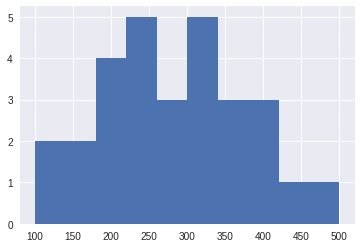

In [235]:
df['preco'].hist()

<h4 style="color:blue;">VISUALIZANDO HISTOGRAMA DE PREÇOS</h4>

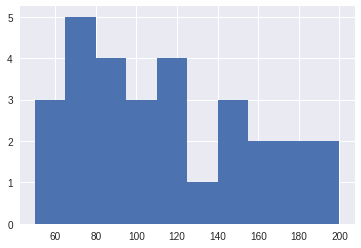

In [236]:
df['m2'].hist()

<h4 style="color:blue;">DISCRETIZANDO OS DADOS</h4>

In [237]:
df.loc[df['localizacao']=='R','localizacao']=0
df.loc[df['localizacao']=='B','localizacao']=1
df.loc[df['localizacao']=='E','localizacao']=2

df.dtypes

m2               int64
preco          float64
localizacao     object
dtype: object

In [238]:
df['localizacao'] = df['localizacao'].astype('int64')
df.dtypes

m2               int64
preco          float64
localizacao      int64
dtype: object

<h4 style="color:blue;">VERIFICANDO DISPERSÃO DOS DADOS<h4>

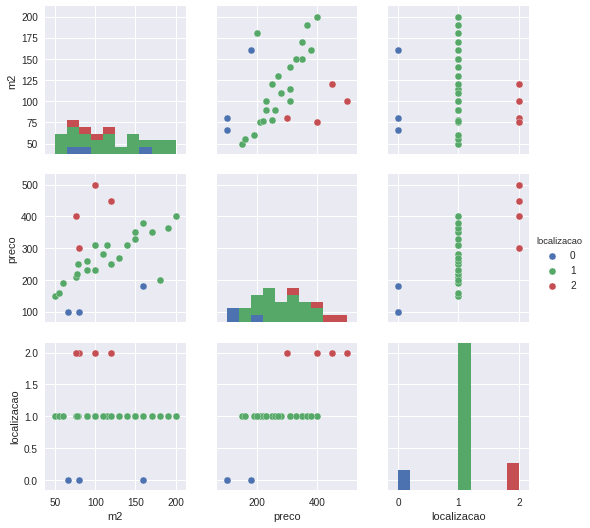

In [239]:
sb.pairplot(df, hue='localizacao')

<h2 style='color:blue'>CORRELAÇÃO</h2>
Coeficiente de correlação, indica a força e a direção do relacionamento linear entre duas variáveis aleatórias. No uso estatístico geral, correlação ou co-relação se refere a medida da relação entre duas variáveis, embora correlação não implique causalidade. 

In [241]:
df.corr(method='spearman')

,m2,preco,localizacao
m2,1.000000,0.540551,-0.049417
preco,0.540551,1.000000,0.651560
localizacao,-0.049417,0.651560,1.000000


<h2 style='color:blue'>COVARIÂNCIA</h2>
Em teoria da probabilidade e na estatística, a covariância, ou variância conjunta, é uma medida do grau de interdependência (ou inter-relação) numérica entre duas variáveis aleatórias. Assim, variáveis independentes têm covariância zero.

In [242]:
df.cov()

,m2,preco,localizacao
m2,1816.908867,1991.188424,-1.530788
preco,1991.188424,9816.995074,35.461823
localizacao,-1.530788,35.461823,0.248768


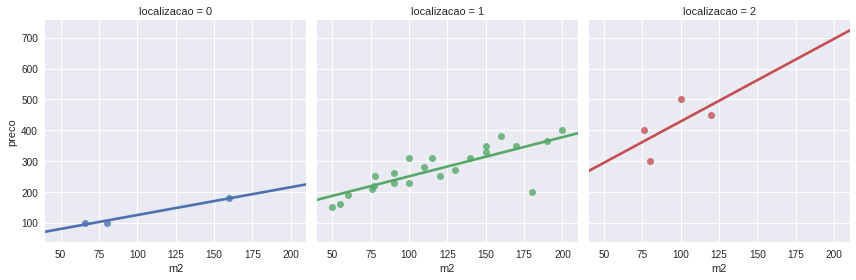

In [243]:
sb.lmplot(x='m2', 
          y='preco', 
          col="localizacao", 
          hue="localizacao", 
          data=df, 
          col_wrap=3, ci=None, 
          size=4)


<h3 style='color:blue'> SELECIONANDO SOMENTE OS VALORES DO DATAFRAME</h3>

In [244]:
treino = df[['m2','localizacao','preco']].values  ## ou .as_matrix()
treino

array([[  76.,    1.,  210.],
       [  78.,    1.,  250.],
       [ 100.,    1.,  310.],
       [  77.,    1.,  220.],
       [  80.,    2.,  300.],
       [  50.,    1.,  150.],
       [  55.,    1.,  160.],
       [  60.,    1.,  190.],
       [ 200.,    1.,  400.],
       [ 150.,    1.,  350.],
       [ 115.,    1.,  310.],
       [ 180.,    1.,  200.],
       [  80.,    0.,  100.],
       [ 100.,    1.,  230.],
       [  76.,    2.,  400.],
       [ 140.,    1.,  310.],
       [ 120.,    1.,  250.],
       [ 170.,    1.,  350.],
       [  90.,    1.,  260.],
       [ 110.,    1.,  280.],
       [ 190.,    1.,  365.],
       [ 120.,    2.,  450.],
       [  66.,    0.,  100.],
       [ 150.,    1.,  330.],
       [ 130.,    1.,  270.],
       [  90.,    1.,  230.],
       [ 160.,    0.,  180.],
       [ 100.,    2.,  500.],
       [ 160.,    1.,  380.]])

<h3 style='color:blue'>SELECIONANDO M2 E LOCALIZAÇÃO</h3>
TREINO

In [245]:
x = treino[:, 0:2]
x

array([[  76.,    1.],
       [  78.,    1.],
       [ 100.,    1.],
       [  77.,    1.],
       [  80.,    2.],
       [  50.,    1.],
       [  55.,    1.],
       [  60.,    1.],
       [ 200.,    1.],
       [ 150.,    1.],
       [ 115.,    1.],
       [ 180.,    1.],
       [  80.,    0.],
       [ 100.,    1.],
       [  76.,    2.],
       [ 140.,    1.],
       [ 120.,    1.],
       [ 170.,    1.],
       [  90.,    1.],
       [ 110.,    1.],
       [ 190.,    1.],
       [ 120.,    2.],
       [  66.,    0.],
       [ 150.,    1.],
       [ 130.,    1.],
       [  90.,    1.],
       [ 160.,    0.],
       [ 100.,    2.],
       [ 160.,    1.]])

<h3 style='color:blue'>SELECIONANDO OS PREÇOS</h3>
ALVO

In [246]:
y = treino[:, np.newaxis,2]
y

array([[ 210.],
       [ 250.],
       [ 310.],
       [ 220.],
       [ 300.],
       [ 150.],
       [ 160.],
       [ 190.],
       [ 400.],
       [ 350.],
       [ 310.],
       [ 200.],
       [ 100.],
       [ 230.],
       [ 400.],
       [ 310.],
       [ 250.],
       [ 350.],
       [ 260.],
       [ 280.],
       [ 365.],
       [ 450.],
       [ 100.],
       [ 330.],
       [ 270.],
       [ 230.],
       [ 180.],
       [ 500.],
       [ 380.]])

<h3 style='color:blue'>TREINANDO O MODELO</h3>

In [247]:
regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h3 style='color:blue'>PREDIZENDO VALOR DE UM APTO</h3>

In [250]:
regr.predict([[150,0]])

array([[ 167.21874423]])